<a href="https://colab.research.google.com/github/MassGH2023/Regression-Models/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
# Note we are loading a slightly different ("cleaned") pickle file
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
# boston = pickle.load(open('data/boston_housing_clean.pickle', "rb" ))
boston = pickle.load(open('boston_housing_clean.pickle', "rb" ))

--2024-12-22 20:42:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60056 (59K) [binary/octet-stream]
Saving to: ‘boston_housing_clean.pickle’

boston_housing_clea 100%[===================>]  58.65K  --.-KB/s    in 0.02s   

2024-12-22 20:42:48 (2.72 MB/s) - ‘boston_housing_clean.pickle’ saved [60056/60056]



In [3]:
type(boston)

dict

In [8]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [12]:
df = boston['dataframe']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
target = 'MEDV'

X = df[[x for x in df.columns if x != 'MEDV']]
y = df['MEDV']

In [28]:
y.iloc[3:5]

,MEDV
3,33.4
4,36.2


class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)


In [20]:
kf = KFold(n_splits=3, shuffle=True, random_state=123)

In [36]:
scores = []
lr = LinearRegression()

for train, test in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train, :], X.iloc[test,:], y.iloc[train], y.iloc[test])

  lr.fit(X_train, y_train)
  lr.predict(X_test)

  score1 = r2_score(y_test, lr.predict(X_test))
  score2 = lr.score(X_test, y_test)

  scores.append(score1)
  scores.append(score2)

In [37]:
scores

[0.6548764502968956,
 0.6548764502968956,
 0.7702392531467169,
 0.7702392531467169,
 0.667172329820265,
 0.667172329820265]

lets scale the dat first before folding it.

**Note**: *use scaled data im lr model!*

In [41]:
scoress = []
lr = LinearRegression()
s = StandardScaler()
for train, test in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train, :], X.iloc[test,:], y.iloc[train], y.iloc[test])
  X_train_s = s.fit_transform(X_train)
  X_test_s = s.transform(X_test)
  lr.fit(X_train_s, y_train)
  lr.predict(X_test_s)

  score1 = r2_score(y_test, lr.predict(X_test_s))
  score2 = lr.score(X_test_s, y_test)

  scoress.append(score1)
  scoress.append(score2)

In [42]:
scoress

[0.6548764502968952,
 0.6548764502968952,
 0.7702392531467167,
 0.7702392531467167,
 0.6671723298202643,
 0.6671723298202643]

same results!!!

Unlike regularized methods such as Ridge or Lasso, ordinary least squares regression doesn't penalize large coefficients. Scaling is critical in Ridge/Lasso because penalties depend on coefficient magnitudes.
 For *vanilla linear regression* (`ordinary least squares regression`), scaling does not affect performance metrics like R2 score.

# Using piprline

In [44]:
s, lr

(StandardScaler(), LinearRegression())

# Cross-validated predictions

**sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', method='predict')**

estimator is the model (e.g., PipeLine(), RandomForestClassifier()) to use for training and predicting. The estimator instance to use to fit the data. It must implement a fit method and the method given by the method parameter.

PipeLine([(    ,    ), (    ,    )])

In [50]:
from sklearn.pipeline import Pipeline
estimator = Pipeline([('firstdoscaling', s), ('afterscalingmodel', lr)])
y_hat = cross_val_predict(estimator, X, y , groups=None, cv=kf)

In [73]:
r2_score(y, y_hat) , np.mean(scores)

(0.6448769310220909, 0.6942114222772339)

In [74]:
alphas = np.geomspace(.000001,1, num= 10)

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [84]:
scores = []
for alfa in alphas:

  lassor = Lasso(alpha = alfa, max_iter= 10000)
  y_hat = cross_val_predict(Pipeline([('idoscaling1st', s), ('thenmodel', lassor)]), X,y, cv = kf)
  scores.append(r2_score(y,y_hat))

alphascores = pd.DataFrame( {"scores": scores, "alphas": alphas})

In [85]:
alphascores

,scores,alphas
0,0.700709,0.000001
1,0.700710,0.000005
2,0.700711,0.000022
3,0.700715,0.000100
4,0.700735,0.000464
5,0.700824,0.002154
6,0.701192,0.010000
7,0.701768,0.046416
8,0.686012,0.215443
9,0.644877,1.000000


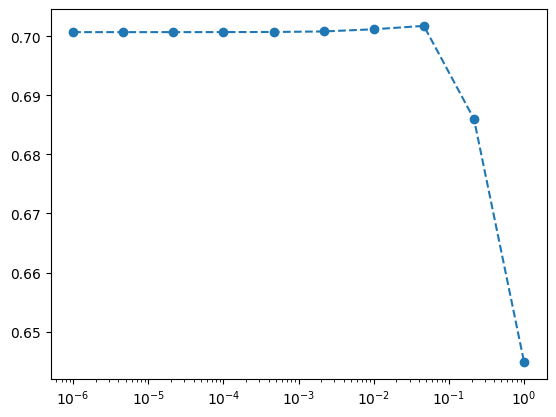

In [81]:
plt.semilogx(alphas, scores, marker = 'o', ls = "--")